In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [55]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, sep='\s+', names=columns, na_values='?')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [56]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64
model_year,int64
origin,int64
car_name,object


In [57]:
df.drop('car_name', axis=1, inplace=True)

In [47]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


In [59]:
df.dropna(inplace=True)

In [60]:
X = df.drop('mpg', axis=1)
y = df['mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

In [62]:
import numpy as np
np.isnan(X_train).sum()

np.int64(0)

In [63]:
from sklearn.model_selection import cross_validate

results = []

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train,
                            scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'],
                            cv=5, return_train_score=False)

    results.append({
        "Model": name,
        "MAE": -np.mean(scores['test_neg_mean_absolute_error']),
        "RMSE": -np.mean(scores['test_neg_root_mean_squared_error']),
        "R²": np.mean(scores['test_r2'])
    })

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)

               Model       MAE      RMSE        R²
5  Gradient Boosting  2.125114  2.928139  0.858928
4      Random Forest  2.119741  2.967568  0.856209
6                KNN  2.260161  3.147501  0.839324
1              Ridge  2.646452  3.419599  0.810301
0  Linear Regression  2.653971  3.422594  0.809871
2              Lasso  2.770480  3.645302  0.785426
3      Decision Tree  2.570323  3.641125  0.784083


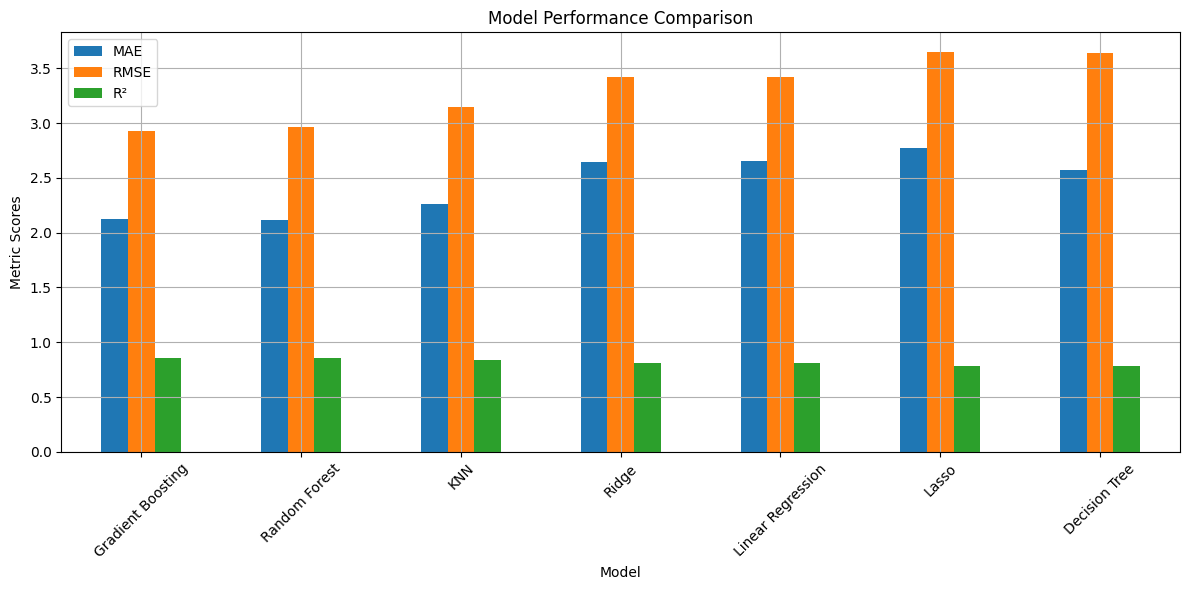

In [64]:
results_df.set_index("Model")[["MAE", "RMSE", "R²"]].plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Scores")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()